<a href="https://colab.research.google.com/github/hudsonhorta/awari_tarefa_ml/blob/main/C%C3%B3pia_de_machine_learning_aula_12_oh_com_log1p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando pacotes e módulos

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.dummy import DummyRegressor

# Declarando constantes

In [2]:
SEED = 42 # semente aleatória

# Carregando e salvando o arquivo de dados

In [3]:
url = 'https://raw.githubusercontent.com/cassiasamp/calculadora-de-imoveis-mar-21/main/manipulacao-de-dados/dados_tratados_ml.csv'
df = pd.read_csv(url)

In [4]:
df.head()

,aluguel,zona,area,quarto
0,1000.0,sul,48.0,2.0
1,1200.0,sul,67.0,3.0
2,1300.0,sul,65.0,2.0
3,1280.0,sul,65.0,2.0
4,1100.0,sul,50.0,2.0


# Dividindo o arquivo entre X (dados que colocaremos no modelo) e y (dados que vamos prever)

In [ ]:
X = df.drop('aluguel', axis=1)
y = df['aluguel']

In [ ]:
X.head()

,zona,area,quarto
0,sul,48.0,2.0
1,sul,67.0,3.0
2,sul,65.0,2.0
3,sul,65.0,2.0
4,sul,50.0,2.0


In [ ]:
y.head()

0    1000.0
1    1200.0
2    1300.0
3    1280.0
4    1100.0
Name: aluguel, dtype: float64

## Fazendo o one hot encoding das variáveis catgóricas de Zona

In [ ]:
X['zona'].unique()

array(['sul', 'norte', 'leste', 'oeste'], dtype=object)

In [ ]:
X = pd.get_dummies(X)

# Dividindo os dados entre treino e teste

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, 
                                                        test_size=0.2, 
                                                        train_size=0.8, 
                                                        random_state=SEED)

# Fazendo a transformação para log + 1 dos dados de treino

In [ ]:
X_treino = np.log1p(X_treino)
y_treino = np.log1p(y_treino)

# Usando um modelo de base (baseline)

In [ ]:
baseline = DummyRegressor(strategy='mean')
baseline.fit(X_treino, y_treino)
y_pred_base = baseline.predict(np.log1p(X_teste))

In [ ]:
print('O R² do modelo de base que sempre prevê a média é:', baseline.score(np.log1p(X_teste), np.log1p(y_teste)))

O R² do modelo de base que sempre prevê a média é: -0.007764930678441972


# Aplicando um modelo de Regressão Linear

In [ ]:
reg = LinearRegression()
reg.fit(X_treino, y_treino)
y_pred = reg.predict(np.log1p(X_teste))

In [ ]:
predicao_em_log1p = reg.predict([np.log1p([62.0, 2, 1, 0, 0, 0])]) # valor real foi 1.500

In [ ]:
predicao_em_log1p

array([7.37911562])

In [ ]:
np.expm1(predicao)

array([1601.17220588])

In [ ]:
reg.score(np.log1p(X_teste), np.log1p(y_teste)) 

0.48911199163465024

In [ ]:
reg.coef_

array([ 0.57322419, -0.04009874, -0.36131075, -0.21735007,  0.30228777,
        0.27637306])

In [ ]:
reg.intercept_

5.298665065924616

In [ ]:
r2_score(np.log1p(y_teste), y_pred)

0.48911199163465024

# Calculando medidas de erro para o modelo de regressão: MAE, MSE, RMSE

In [ ]:
mean_absolute_error(np.log1p(y_teste), y_pred) # MAE

0.29768882393985957

In [ ]:
mean_squared_error(np.log1p(y_teste), y_pred) # MSE

0.14332254175447987

In [ ]:
mean_squared_error(np.log1p(y_teste), y_pred, squared=False) # RMSE

0.3785796372686728

# Aplicando um modelo de KNN (K vizinhos mais próximos)

In [ ]:
knn = KNeighborsRegressor()

In [ ]:
knn # hiperparâmetros

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
knn.fit(X_treino, y_treino)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
y_pred_knn = knn.predict(np.log1p(X_teste))

## Comparando as métricas entre KNN e Regressão Linear

In [ ]:
print('Métricas do KNN com 5 vizinhos')
print('O R² foi:' , knn.score(np.log1p(X_teste), np.log1p(y_teste)))
print('O MAE foi:' , mean_absolute_error(np.log1p(y_teste), y_pred_knn))
print('O MSE foi:' , mean_squared_error(np.log1p(y_teste), y_pred_knn))

Métricas do KNN com 5 vizinhos
O R² foi: 0.43731428088990276
O MAE foi: 0.30938768503535347
O MSE foi: 0.15785367076796727


In [ ]:
print('Métricas da Regressão Linear')
print('O R² foi:' , reg.score(np.log1p(X_teste), np.log1p(y_teste)))
print('O MAE foi:' , mean_absolute_error(np.log1p(y_teste), y_pred))
print('O MSE foi:' , mean_squared_error(np.log1p(y_teste), y_pred))

Métricas da Regressão Linear
O R² foi: 0.48911199163465024
O MAE foi: 0.29768882393985957
O MSE foi: 0.14332254175447987


# Aplicando um modelo de Árvore de Decisão

In [ ]:
dt = DecisionTreeRegressor(max_depth=3,)
dt.fit(X_treino, y_treino)
y_pred_dt = dt.predict(np.log1p(X_teste))

## Visualizando a Árvore de Decisão

In [ ]:
X_treino.columns

Index(['area', 'quarto', 'zona_leste', 'zona_norte', 'zona_oeste', 'zona_sul'], dtype='object')

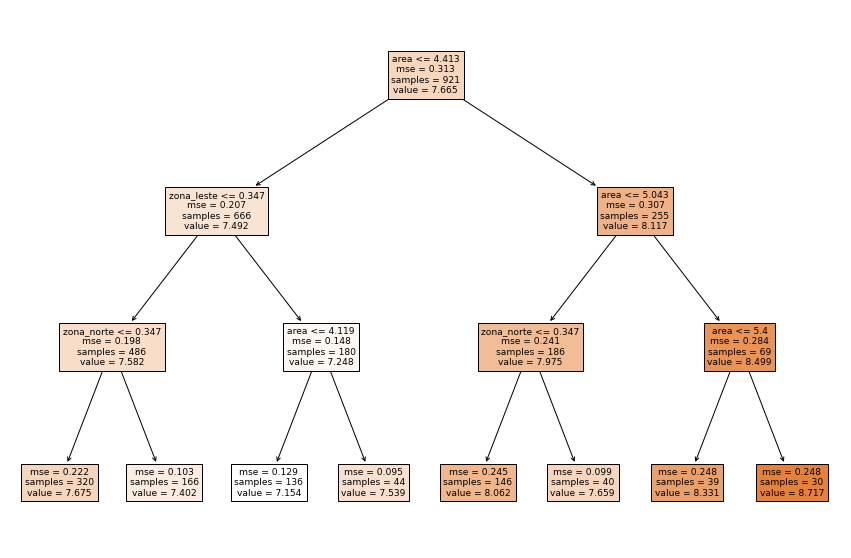

In [ ]:
plt.figure(figsize=(15, 10))

plot_tree(dt, feature_names=X_treino.columns, filled=True);

In [ ]:
for feature in zip(X_treino.columns, dt.feature_importances_):
  print(feature)
  print('---')

('area', 0.7698714176682245)
---
('quarto', 0.0)
---
('zona_leste', 0.12085862576782158)
---
('zona_norte', 0.1092699565639539)
---
('zona_oeste', 0.0)
---
('zona_sul', 0.0)
---


In [ ]:
dt.score(np.log1p(X_teste), np.log1p(y_teste))

0.4300659686835644

In [ ]:
print('Métricas da Árvore de Decisão')
print('O R² foi:' , dt.score(np.log1p(X_teste), np.log1p(y_teste)))
print('O MAE foi:' , mean_absolute_error(np.log1p(y_teste), y_pred_dt))
print('O MSE foi:' , mean_squared_error(np.log1p(y_teste), y_pred_dt))

Métricas da Árvore de Decisão
O R² foi: 0.4300659686835644
O MAE foi: 0.31084301601650277
O MSE foi: 0.15988708418114633


In [ ]:
print('Métricas da Árvore de Decisão')
print('O R² foi:' , dt.score(X_treino, y_treino))

Métricas da Árvore de Decisão
O R² foi: 0.42076553627113666


# Aplicando o modelo Random Forest Regressor nos dados

In [ ]:
rfr = RandomForestRegressor(random_state=SEED)

# Usando o score de validação cruzada para escolher um modelo

In [ ]:
cv_base = cross_val_score(baseline, X_treino, y_treino)
cv_reg = cross_val_score(reg, X_treino, y_treino)
cv_knn = cross_val_score(knn, X_treino, y_treino)
cv_dt = cross_val_score(dt, X_treino, y_treino)
cv_rfr = cross_val_score(rfr, X_treino, y_treino)

In [ ]:
cv_base

array([-0.01469146, -0.01467077, -0.0144541 , -0.03461211, -0.01042012])

In [ ]:
cvs = [cv_base, cv_reg, cv_knn, cv_dt, cv_rfr]

for cv, pontuacoes in enumerate(cvs):
  print(f'{cv}: {np.mean(pontuacoes):.2f}')

0: -0.02
1: 0.44
2: 0.40
3: 0.33
4: 0.35


## Usando a busca em grade com validação cruzada (Grid Search CV) para o Random Forest Regressor

In [ ]:
parametros = {'max_depth': [5, 10, 30, 20],
              'n_estimators': [100, 200, 150, 110]}

In [ ]:
gs = GridSearchCV(rfr, parametros, cv=5, scoring='r2', verbose=2)

In [ ]:
gs.fit(X_treino, y_treino)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .................... max_depth=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .................... max_depth=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .................... max_depth=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .................... max_depth=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .................... max_depth=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, n_estimators=200 ...................................
[CV] .................... max_depth=5, n_estimators=200, total=   0.3s
[CV] max_depth=5, n_estimators=200 ...................................
[CV] .................... max_depth=5, n_estimators=200, total=   0.3s
[CV] max_depth=5, n_estimators=200 ...................................
[CV] .................... max_depth=5, n_estimators=200, total=   0.3s
[CV] max_depth=5, n_estimators=200 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   22.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
gs.best_score_

0.4470697180198509

In [ ]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [ ]:
resultados_gs = pd.DataFrame(gs.cv_results_)

In [ ]:
resultados_gs.sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.281646,0.009169,0.014004,0.000112,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.430814,0.369273,0.491102,0.503093,0.441066,0.447070,0.047812,1
3,0.155583,0.007954,0.008793,0.000728,5,110,"{'max_depth': 5, 'n_estimators': 110}",0.432345,0.370894,0.487193,0.501851,0.440161,0.446489,0.046209,2
2,0.217660,0.005799,0.011231,0.000339,5,150,"{'max_depth': 5, 'n_estimators': 150}",0.431309,0.370786,0.487607,0.501016,0.438749,0.445893,0.046224,3
0,0.151017,0.006550,0.008328,0.000571,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.431147,0.371296,0.486525,0.499877,0.439399,0.445649,0.045584,4
7,0.186820,0.001860,0.010045,0.000168,10,110,"{'max_depth': 10, 'n_estimators': 110}",0.364020,0.301476,0.490721,0.413730,0.385967,0.391183,0.062014,5


In [ ]:
rfr_tunado = RandomForestRegressor(max_depth=5, 
                                   n_estimators=200, 
                                   random_state=SEED)

In [ ]:
rfr_tunado.fit(X_treino, y_treino)
y_pred_rfr_tunado = rfr_tunado.predict(X_teste)
print('O R² final do Random Forest após a busca de hiperparâmetros e a validação cruzada é:', rfr_tunado.score(np.log1p(X_teste), np.log1p(y_teste)))

O R² final do Random Forest após a busca de hiperparâmetros e a validação cruzada é: 0.5009271137455349


# Salvando o modelo

In [ ]:
import pickle

In [ ]:
# para criar o arquivo do pickle, .pkl, fazemos um pickle.dump
# passando o nome do modelo que queremos salvar, o nome do arquivo dentro de open
# e a escrita em binário com wb (write binary)
pickle.dump(rfr_tunado, open('modelo_rfr.pkl', 'wb'))

In [ ]:
modelo_final = pickle.load(open('modelo_rfr.pkl', 'rb'))

In [ ]:
modelo_final.score(np.log1p(X_teste), np.log1p(y_teste))

0.5009271137455349

In [ ]:
# # depois de 5 anos se precisarmos recalibrar o modelo
# modelo = pickle.load(open('modelo_rfr_tunado.pkl', 'rb'))
# modelo.fit(X_treino, y_treino)
# gs_pos_5_anos = GridSearchCV(modelo, parametros)
# gs_pos_5_anos.best_estimator_